# Telco Customer Churn Prediction

<table><tr><td><img src = "CC.png" width = 518 height = 300 align></img></td></tr></table>

* Churn Prediction is  a **Key Predictor** of the Long Term Sucess or Failure of Business.

* Churn | Attrition : Customers Who Left using **Company Product** or **Service** within the Last Month.

* Customer Retention should be a Top Priority of any Business for keepin the Existing Loyal Customers.

* A Company should determine the Customers more at Risk and take **Preventive Measures.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

# Data

* Each Row Represents a Customer. 

* Each Column Represents Customer’s Attributes.

**1.Demographic Data :**

* Age : Age of a Customer.

* Gender : Male | Female.

* Senior Citizen : 1 | 0.

* Partner or Single : Yes | No.

* Dependent or Independent : Yes | No.

**2.Services of Company :**

* Phone Service : Yes | No.

* Multiple Lines : Yes | No | No Phone Service.

* Intenet Service : DSL | Fibre Optics | No. 

* Online Security : Yes | No | No Internet Service.

* Device Protection : Yes | No | No Internet Service.

* Tech Support : Yes | No | No Internet Service.

* TV Streaming : Yes | No | No Internet Service.

* Movies Streaming : Yes | No | No Internet Service.

**3.Accounts Information :**

* Contract : Month to Month | Two Year | One Year.

* Payment Method : Electronic Check | Mailed Check | Bank Transfer (Automatic) | Credit Card (Automatic).

* Paperless Billing : Yes | No.

* Monthly Charges

* Total Charges

* Tenures : Length of Tenure in Months.

**4.Target :**

* Churn

In [2]:
# Data Set :
data = pd.read_csv('Customer Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data Set Information :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis : EDA

In [4]:
data.isna().any() # Any Missing Data ?

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
# Not Important, but just trying to Keep Everything in Same Pace...

col = list(data.columns) # Making a List of Column Names to Change Each Column Names to Camel Case.
col[0] = 'CustomerID'
col[1] = 'Gender'
col[5] = 'Tenure'
col

['CustomerID',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
data.columns = col # Changing New Name instead of Old Names 
data.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Find Binary Feature | Variables : Features with only two Values (Labels | Classes) :
binary_features = []

for col in data.columns :
    if data[col].value_counts().shape[0] == 2 :
        binary_features.append(col)

print(f'Binary Feature: {binary_features}')

Binary Feature: ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


Remaining are Features with Multiple Values : Ordinal, Nomianal 

## Binary Categorical Features

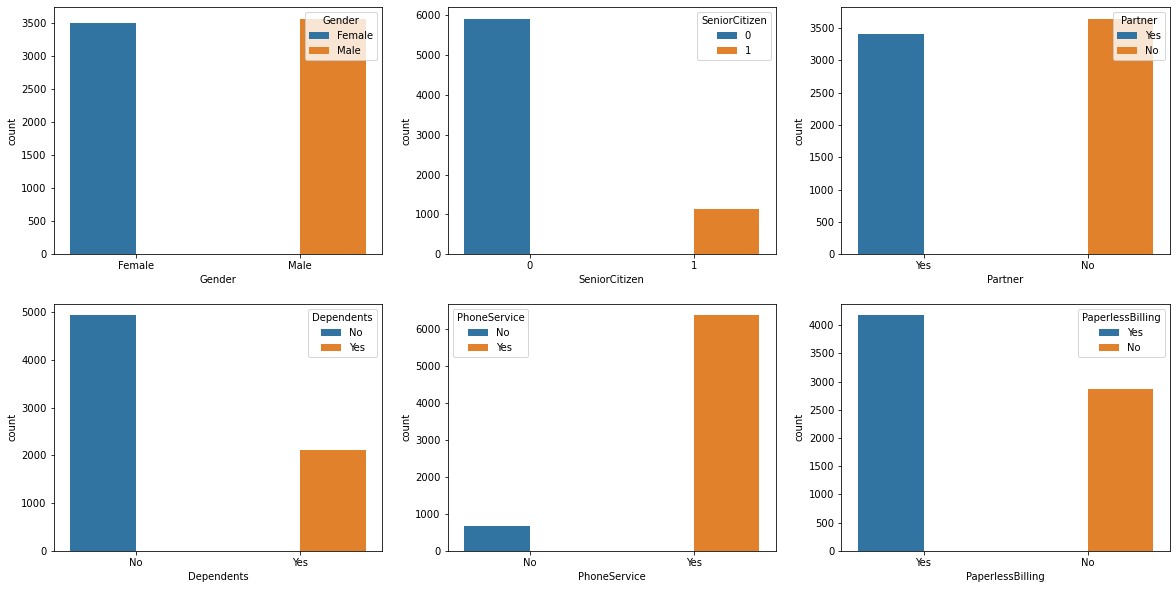

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

sns.countplot(x = 'Gender', data = data, hue = 'Gender', ax = axes[0,0])
sns.countplot(x = 'SeniorCitizen', data = data, hue = 'SeniorCitizen', ax = axes[0,1])
sns.countplot(x = 'Partner', data = data, hue = 'Partner', ax = axes[0,2])
sns.countplot(x = 'Dependents', data = data, hue = 'Dependents', ax = axes[1,0])
sns.countplot(x = 'PhoneService', data = data, hue = 'PhoneService', ax = axes[1,1])
sns.countplot(x = 'PaperlessBilling', data = data, hue = 'PaperlessBilling', ax = axes[1,2]);

There is **High Imbalance** between Senior Citizen and Phone Service.

Senior Citizen's Hardly use Phone Services.

There are Very Less Persons who Never use Phone Services, almost Everyone use Phone Services.

In [10]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
# Encoding Binary Categorical Values 'Yes' and 'No' to Binary Numeric Values 1's and 0's
data['Churn'] = np.where(data['Churn'] == 'Yes',1,0)

Try to Find Relationship of Churn with Each and Every Feature of the Data Set.

In [12]:
data.groupby('Gender')[['Churn']].mean()

# Gender has no Relation with Churn.

,Churn
Gender,
Female,0.269209
Male,0.261603


Average Churn Rate of Male and Female is **Almost Equal.**

Gender is not Responsible for the Churn.

In [13]:
data.groupby('SeniorCitizen')[['Churn']].mean()

# Senior Citizens use Less Phone, Internet and Other Services.

# Few Senior Citizens just use Services of Streaming TV and Movies if they have no Eye or Ear Problems. 

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [14]:
data.groupby('Partner')[['Churn']].mean()

# Partners Communicate More with Each Other as well as they Use Other Services as well, so they Hardly Churn.

,Churn
Partner,
No,0.329580
Yes,0.196649


In [15]:
data.groupby('PhoneService')[['Churn']].mean()

# Phone Service is a Basic Thing Customer will not Churn Due to Phone Service.

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [16]:
data.groupby('PaperlessBilling')[['Churn']].mean()

# Not Every Customer is Comfortable with Paperless Billing. 

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


# Pivot Table

* Relationship between Features and Target Variable

In [17]:
pd.pivot_table(data, values = 'Churn', index = ['Gender'], columns = ['SeniorCitizen'], aggfunc = np.mean)

SeniorCitizen,0,1
Gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [18]:
pd.pivot_table(data, values = 'Churn', index = ['Partner'], columns = ['Dependents'], aggfunc = np.mean)

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


# Remaining Categorical Data 

1. Internet Service

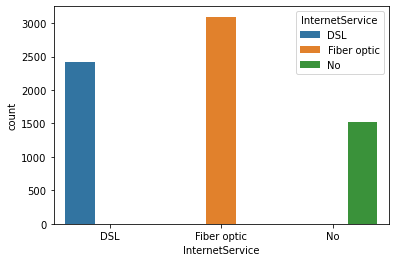

In [19]:
sns.countplot('InternetService', data = data, hue='InternetService');

In [20]:
data.groupby('InternetService')[['InternetService', 'Churn']].mean()

# Fibre Optics is Expensive, not all Customers can Afford that Service.

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [21]:
# Monthly Charges on Internet Services
data.groupby('InternetService')[['MonthlyCharges']].mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fibre Optics Connection is much more Expensive than DSL, the main Reason to Churn.

# Count Plot 

* Remaining Categorical Data

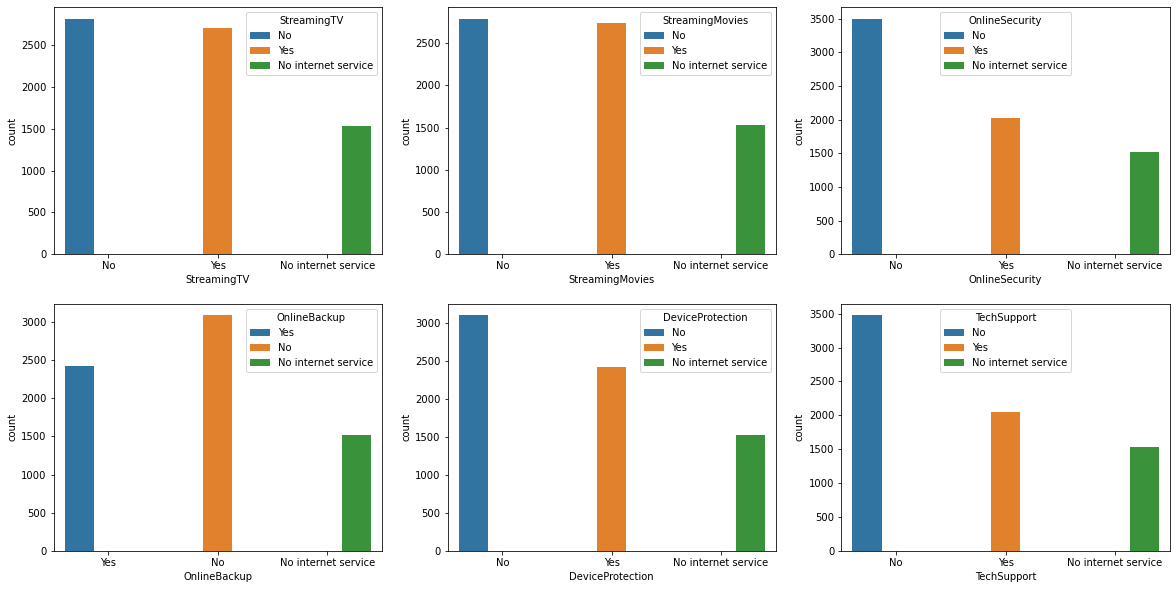

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20,10))

sns.countplot(x = 'StreamingTV', data = data, hue='StreamingTV', ax = axes[0,0])
sns.countplot(x = 'StreamingMovies', data = data, hue = 'StreamingMovies', ax = axes[0,1])
sns.countplot(x = 'OnlineSecurity', data = data, hue = 'OnlineSecurity', ax = axes[0,2])
sns.countplot(x = 'OnlineBackup', data = data, hue = 'OnlineBackup', ax = axes[1,0])
sns.countplot(x = 'DeviceProtection', data = data, hue = 'DeviceProtection', ax = axes[1,1])
sns.countplot(x = 'TechSupport', data = data, hue = 'TechSupport', ax = axes[1,2]);

In [23]:
data.groupby('StreamingTV')[['Churn']].mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [24]:
data.groupby('StreamingMovies')[['Churn']].mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [25]:
data.groupby('OnlineSecurity')[['Churn']].mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [26]:
data.groupby('OnlineBackup')[['Churn']].mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [27]:
data.groupby('DeviceProtection')[['Churn']].mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [28]:
data.groupby('TechSupport')[['Churn']].mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


We are Trying to Find the Impact of Each Feature that may be Responsible for Customer Churn.

# Phone Service

In [29]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [30]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [31]:
data.groupby('PhoneService')[['Churn']].mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [32]:
data.groupby('MultipleLines')[['Churn']].mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


# Contract 

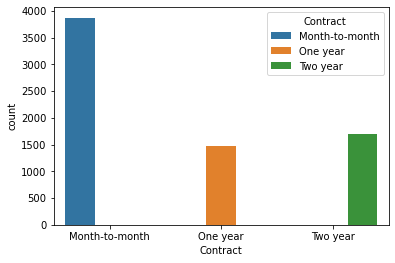

In [33]:
sns.countplot('Contract', data = data, hue = 'Contract');

In [34]:
data.groupby('Contract')[['Churn']].mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


# Payment Method

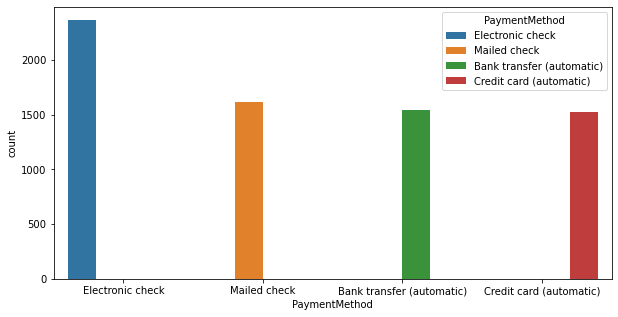

In [35]:
plt.figure(figsize = (10,5))
sns.countplot('PaymentMethod', data = data, hue = 'PaymentMethod');

In [36]:
data.groupby('PaymentMethod')[['Churn']].mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


# Continuous Variables 

In [37]:
list(data.select_dtypes('number').columns)

['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'Churn']

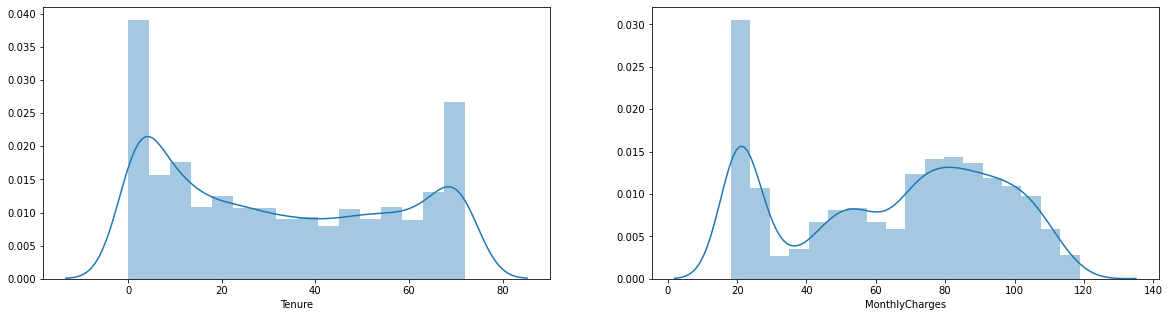

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,5))

sns.distplot(data['Tenure'], ax = axes[0])
sns.distplot(data['MonthlyCharges'], ax = axes[1]);

In [39]:
data.groupby('Churn')[['Tenure', 'MonthlyCharges']].mean()

,Tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


People who have been a Customer for a Long Time tends to Stay with the Company

In [40]:
data.groupby('Contract')[['Tenure']].mean()

,Tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


Contract and Tenure are **Highly Correlated.**

Customers with Long Contract Stays Long with the Company as Compared to Customers with Short Term Contracts.

# Sweetviz

* Beautiful and High Density Visualizations for Exploratory Data Analysis

In [41]:
eda = sv.analyze([data, "data"],target_feat='Churn')

eda.show_html('Report.html') # Exploratory Data Analysis Report for Customer Churn.

:FEATURES DONE:                    |█████████████████████| [100%]   00:13  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
Creating Associations graph...DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


**Conclusion** (Sweetviz) :

Customer ID, Gender, Total Charges, Phone Service and Multiple Line do not give any Information regarding Churn.

We can Drop this Features.

In [42]:
# Drop Customer ID
data.drop(['CustomerID', 'Gender', 'PhoneService', 'MultipleLines', 'TotalCharges'], axis = 1, inplace = True)
data.head()

,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [43]:
data.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                 int32
dtype: object

# Data Preprocessing

* Encoding Categorical Data to Numeric Data

* Scaling Continuous Variables

In [44]:
categorical_columns = list(data.select_dtypes('object').columns)
categorical_columns

['Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [45]:
# Create Dummies :
X = pd.get_dummies(data, columns = categorical_columns, drop_first = True)
X.head()

,SeniorCitizen,Tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Min Max Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X['Tenure'] = scaler.fit_transform(data[['Tenure']])

X['MonthlyCharges'] = scaler.fit_transform(data[['MonthlyCharges']])

X.head()

,SeniorCitizen,Tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.472222,0.385075,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0.027778,0.354229,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0.625000,0.239303,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0.027778,0.521891,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [47]:
# Check whether Target Feature | Variable is Balanced or Imbalanced.
data['Churn'].value_counts()

# Target Feature has Imbalanced Class, therefor Resampling is Needed.

0    5174
1    1869
Name: Churn, dtype: int64

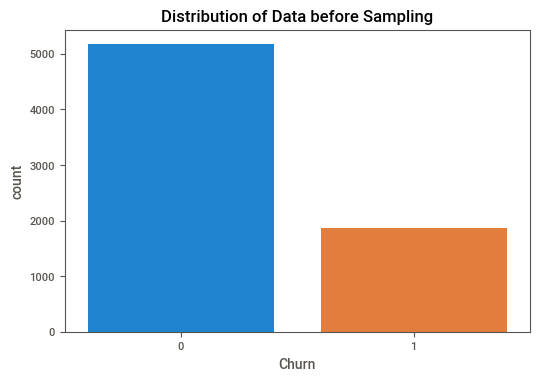

In [48]:
sns.countplot('Churn', data = data).set_title('Distribution of Data before Sampling');

# Upsampling

In [49]:
X_no = X[X['Churn'] == 0]

X_yes = X[X['Churn'] == 1]

print(f'No : {len(X_no)} | Yes : {len(X_yes)}')

No : 5174 | Yes : 1869


In [50]:
# Yes Needs Upscaling
X_yes_upsample = X_yes.sample(n = len(X_no), replace = True, random_state = 42)
print(f'Upsampled Yes : {len(X_yes_upsample)}')

Upsampled Yes : 5174


In [51]:
X = X_no.append(X_yes_upsample).reset_index(drop = True)

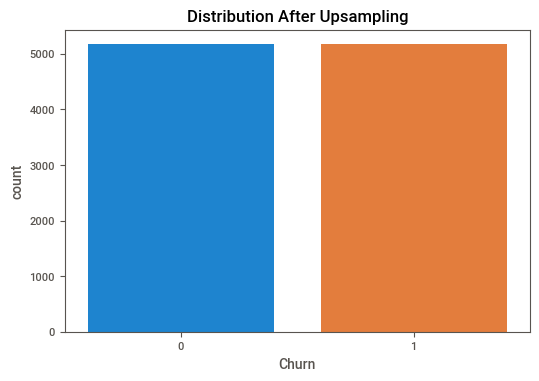

In [52]:
sns.countplot('Churn', data = X).set_title('Distribution After Upsampling');

In [53]:
X['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [54]:
# Split Data into Independent and Dependent Variables :
x = X.drop('Churn', axis = 1)
y = X['Churn']

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# Data Modeling

1. Ridge Classifier :

In [55]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
ridge_classifier = RidgeClassifier().fit(x_train, y_train)

In [57]:
y_prediction = ridge_classifier.predict(x_train)

print(f'Accuracy of Ridge Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Train Set : 75.91%


* Model Evaluation :

In [58]:
y_prediction = ridge_classifier.predict(x_test)

print(f'Accuracy of Ridge Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Test Set : 76.28%


Accuracy is not very Good, so try Different Model

2. Random Forest Classifier :

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10).fit(x_train, y_train)

y_prediction = rfc.predict(x_train)

print(f'Accuracy of Random Forest Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = rfc.predict(x_test)

print(f'Accuracy of Random Forest Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Random Forest Classifier on Train Set : 87.87%
Accuracy of Random Forest Classifier on Test Set : 84.88%


Accuracy on Training Set is Slightly more that Represents **Overfitting.** 

We can Decrease the Depth of the Tree to Prevent Model from **Overfitting,** It may also Decrease Accuracy.

We Must Carefully Optimize the Parameters, Parameter Tuning is Very Critical Part.

We can Increase the Number of Trees which will Help the Model to be more Generalized and Reduce Overfitting.

Another way is to do **Cross Validation** which Allows to Use Every Sample in Train Set and Test Set.

# Grid Search Cross Validation

* Improving the Model :

In [60]:
from sklearn.model_selection import GridSearchCV

parameters  = {'n_estimators' : [150, 200, 250, 300], 'max_depth' : [15, 20, 25]}

gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x_train,y_train)

In [61]:
# Best Parameters :

gsv_rfc.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [62]:
# Best Score :

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 88.08%


Grid Search Cross Validation has Improved the Accuracy Score of the Model.

Checking the Accuracy of Model on the Entire Data Set.

In [63]:
gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x,y)

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 90.11%


We Have Achieved an Overall Accuracy of **90%**

The Mean Cross Validated Score of The Best Estimator,

Using the Grid Search Cross Validation we Improved the **Model Accuracy.**